In [1]:
import os, sys, json
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
sys.path.append("..")

In [2]:
# read from json
data = None
data2 = None
data_path = "../../../output/prioplus-eurosys25/experiments/"
experiment_name = "fig10c1"
experiment_name2 = "fig10c2"
with open(data_path + experiment_name + ".json", "r") as f:
    data = json.load(f)
with open(data_path + experiment_name2 + ".json", "r") as f:
    data2 = json.load(f)

In [3]:
# Calculate the send rate from data{flowStatistics:[]:sentPkt:[timeNs,sizeByte]}
# The send rate is calculated by the number Bytes sent in each time interval
send_rate_interval_ns = 10e4  # 10us
# calculate the total send rate of 8 prio flows and each prio has 50 flows
flow_nums = [10, 10]
prio_num = 2

def get_throughput(data):
    send_rate = [[] for i in range(prio_num)]
    prev_flow_nums = 0
    for i in range(prio_num):
        flow_num = flow_nums[i]
        wnd_start = data["flowStatistics"][prev_flow_nums]["sentPkt"][0]["timeNs"]
        # the first point
        send_rate[i].append({"timeNs": wnd_start, "sendRateGbps": 0})
        wnd_data = 0
        pkt_idxs = [0 for _ in range(flow_num)]
        while True:
            wnd_data = 0
            next_wnd_start = wnd_start + send_rate_interval_ns
            for j in range(flow_num):
                pkt_idx = 0
                for pkt_idx in range(pkt_idxs[j], len(data["flowStatistics"][prev_flow_nums + j]["sentPkt"])):
                    sentPkt = data["flowStatistics"][prev_flow_nums + j]["sentPkt"][pkt_idx]
                    if sentPkt["timeNs"] - wnd_start > send_rate_interval_ns:
                        # Gbps = bpns
                        # pkt_idxs[j] = pkt_idx - 1
                        break
                    wnd_data += sentPkt["sizeByte"]
                pkt_idxs[j] = pkt_idx
            send_rate[i].append({"timeNs": wnd_start + send_rate_interval_ns/2,
                                "sendRateGbps": wnd_data * 8 / send_rate_interval_ns})
            wnd_start = next_wnd_start

            should_break = True
            for j in range(flow_num):
                if pkt_idxs[j] < len(data["flowStatistics"][prev_flow_nums + j]["sentPkt"]) - 1:
                    should_break = False
                    break
            if should_break:
                break
        # the last point
        send_rate[i].append({"timeNs": wnd_start + send_rate_interval_ns/2,
                            "sendRateGbps": 0})
        prev_flow_nums += flow_num
    
    return send_rate

send_rate = get_throughput(data)
send_rate2 = get_throughput(data2)


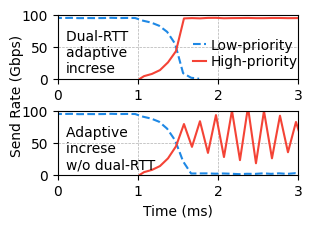

In [4]:
# draw the send rate in a new figure
# fig = plt.figure(figsize=(3, 2))
fig, axs = plt.subplots(2, 1, figsize=(3, 2), gridspec_kw={
                        'height_ratios': [1, 1]})
# fig.tight_layout()
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.5)

ax1 = axs[0]
# ax1.set_xlabel("Time (us)")
# ax1.set_ylabel("Rate(Gbps)")

time_shift = 100e3

color_rate = ["#1E88E5", "#F44336"]
line = ["--", "-"]
labels = ["Low-priority", "High-priority"]

switch_idx = 0
port_idx = 1000
queue_idx = 0

for i in range(prio_num):
    ax1.plot([s["timeNs"]/1e6 - 104 for s in send_rate[i]], [s["sendRateGbps"]
             for s in send_rate[i]], color=color_rate[i], linestyle=line[i], label=labels[i])
ax1.grid(True, linestyle='--', linewidth=0.5, which='both', axis='both')

ax1.set_xlim(0, 3)
ax1.set_ylim(0, 100)

ax2 = axs[1]
for i in range(prio_num):
    ax2.plot([s["timeNs"]/1e6 - 104 for s in send_rate2[i]], [s["sendRateGbps"]
             for s in send_rate2[i]], label="flow"+str(i), color=color_rate[i], linestyle=line[i])
ax2.grid(True, linestyle='--', linewidth=0.5, which='both', axis='both')

ax2.set_xlim(0, 3)
ax2.set_ylim(0, 100)

ax2.set_xlabel("Time (ms)")

ax1.annotate('Dual-RTT \nadaptive \nincrese', xy=(0, 15), xytext=(0.1, 10),
             xycoords='data')
ax2.annotate('Adaptive \nincrese \nw/o dual-RTT', xy=(0, 15), xytext=(0.1, 10),
             xycoords='data')
ax1.legend(frameon=False, labelspacing=0.2, bbox_to_anchor=(
    0.78, 0.4), loc="center", handlelength=1, handletextpad=0.3)

fig.text(-0.06, 0.5, "Send Rate (Gbps)", va='center', rotation='vertical')

# save as pdf
plt.savefig("../figures/" + "fig10c" +
            ".pdf", bbox_inches='tight', dpi=600, format='pdf')

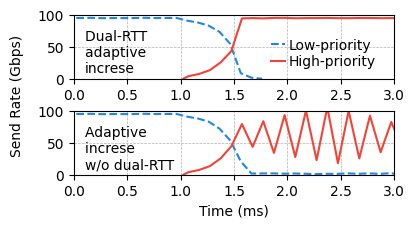

In [5]:
# draw the send rate in a new figure
# fig = plt.figure(figsize=(3, 2))
fig, axs = plt.subplots(2, 1, figsize=(4, 2), gridspec_kw={
                        'height_ratios': [1, 1]})
# fig.tight_layout()
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.5)

ax1 = axs[0]
# ax1.set_xlabel("Time (us)")
# ax1.set_ylabel("Rate(Gbps)")

time_shift = 100e3

color_rate = ["#1E88E5", "#F44336"]
line = ["--", "-"]
labels = ["Low-priority", "High-priority"]

switch_idx = 0
port_idx = 1000
queue_idx = 0

for i in range(prio_num):
    ax1.plot([s["timeNs"]/1e6 - 104 for s in send_rate[i]], [s["sendRateGbps"]
             for s in send_rate[i]], color=color_rate[i], linestyle=line[i], label=labels[i])
ax1.grid(True, linestyle='--', linewidth=0.5, which='both', axis='both')

ax1.set_xlim(0, 3)
ax1.set_ylim(0, 100)

ax2 = axs[1]
for i in range(prio_num):
    ax2.plot([s["timeNs"]/1e6 - 104 for s in send_rate2[i]], [s["sendRateGbps"]
             for s in send_rate2[i]], label="flow"+str(i), color=color_rate[i], linestyle=line[i])
ax2.grid(True, linestyle='--', linewidth=0.5, which='both', axis='both')

ax2.set_xlim(0, 3)
ax2.set_ylim(0, 100)

ax2.set_xlabel("Time (ms)")

ax1.annotate('Dual-RTT \nadaptive \nincrese', xy=(0, 15), xytext=(0.1, 10),
             xycoords='data')
ax2.annotate('Adaptive \nincrese \nw/o dual-RTT', xy=(0, 15), xytext=(0.1, 10),
             xycoords='data')
ax1.legend(frameon=False, labelspacing=0.2, bbox_to_anchor=(
    0.78, 0.4), loc="center", handlelength=1, handletextpad=0.3)

fig.text(-0.06, 0.5, "Send Rate (Gbps)", va='center', rotation='vertical')

# save as pdf
plt.savefig("../figures/" + "fig10c" +
            ".png", bbox_inches='tight', dpi=600, format='png')